In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
df = pd.read_csv("Downloads/OCTOBER 2025 ALL DATA/heart_attack_south_africa.csv")

In [12]:

# checking for sample data
np.random.seed(42)
n_samples = 500

df = pd.DataFrame({
    'age': np.random.randint(30, 80, n_samples),
    'cholesterol': np.random.normal(200, 40, n_samples),
    'blood_pressure': np.random.randint(90, 180, n_samples),
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'smoking_status': np.random.choice(['Yes', 'No'], n_samples),
    'physical_activity': np.random.choice(['Low', 'Medium', 'High'], n_samples),
    'obesity_index': np.random.uniform(18, 40, n_samples),
    'heart_attack': np.random.choice([0, 1], n_samples)
})

# Display dataset info
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (500, 8)
   age  cholesterol  blood_pressure  gender smoking_status physical_activity  \
0   68    70.349306             151  Female            Yes              High   
1   58   159.024494             162  Female             No            Medium   
2   44   189.897274             115  Female            Yes            Medium   
3   72   150.088673             155  Female             No               Low   
4   37   265.296452             162    Male            Yes               Low   

   obesity_index  heart_attack  
0      24.144074             0  
1      32.143402             0  
2      33.271313             0  
3      29.278405             0  
4      24.716835             1  


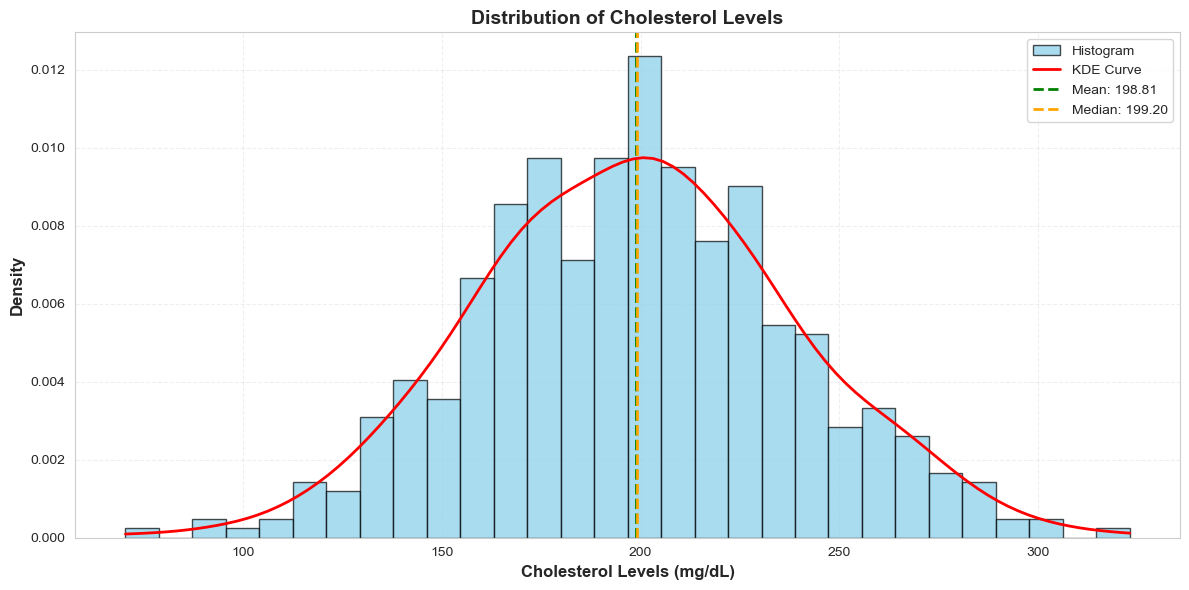


Mean: 198.81
Median: 199.20
Std Dev: 39.74


In [14]:

# QUESTION 1A - CHOLESTEROL DISTRIBUTION PLOT

plt.figure(figsize=(12, 6))

# Create histogram with KDE
plt.hist(df['cholesterol'], bins=30, alpha=0.7, color='skyblue', 
         edgecolor='black', density=True, label='Histogram')

# Add KDE curve
kde_data = df['cholesterol'].dropna()
kde = stats.gaussian_kde(kde_data)
x_range = np.linspace(kde_data.min(), kde_data.max(), 100)
plt.plot(x_range, kde(x_range), color='red', linewidth=2, label='KDE Curve')

# Customization
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlabel('Cholesterol Levels (mg/dL)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Distribution of Cholesterol Levels', fontsize=14, fontweight='bold')

# Add mean and median lines
mean_chol = df['cholesterol'].mean()
median_chol = df['cholesterol'].median()
plt.axvline(mean_chol, color='green', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_chol:.2f}')
plt.axvline(median_chol, color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {median_chol:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

# Print insights
print(f"\nMean: {mean_chol:.2f}")
print(f"Median: {median_chol:.2f}")
print(f"Std Dev: {df['cholesterol'].std():.2f}")

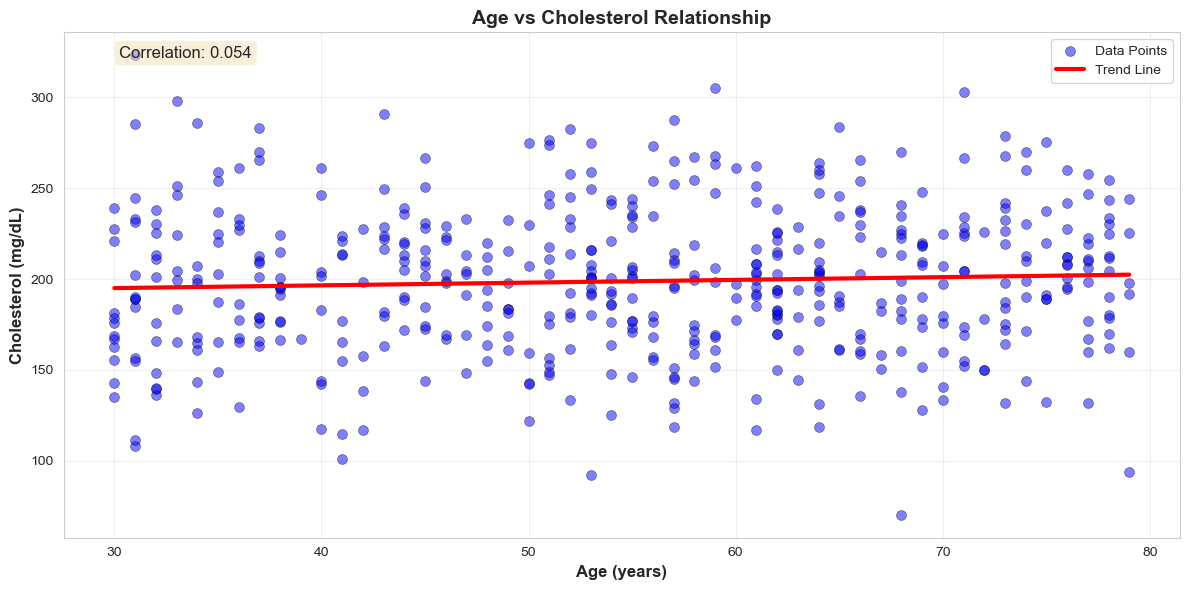

Correlation: 0.054


In [16]:
#QUESTION 1B - OVERLAYING LINE AND SCATTER PLOT


plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(df['age'], df['cholesterol'], alpha=0.5, color='blue', 
            s=50, edgecolors='black', linewidth=0.5, label='Data Points')

# Trend line
z = np.polyfit(df['age'], df['cholesterol'], 1)
p = np.poly1d(z)
plt.plot(df['age'].sort_values(), p(df['age'].sort_values()), 
         color='red', linewidth=3, label='Trend Line')

# Customization
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Cholesterol (mg/dL)', fontsize=12, fontweight='bold')
plt.title('Age vs Cholesterol Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Correlation
correlation = df['age'].corr(df['cholesterol'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Correlation: {correlation:.3f}")

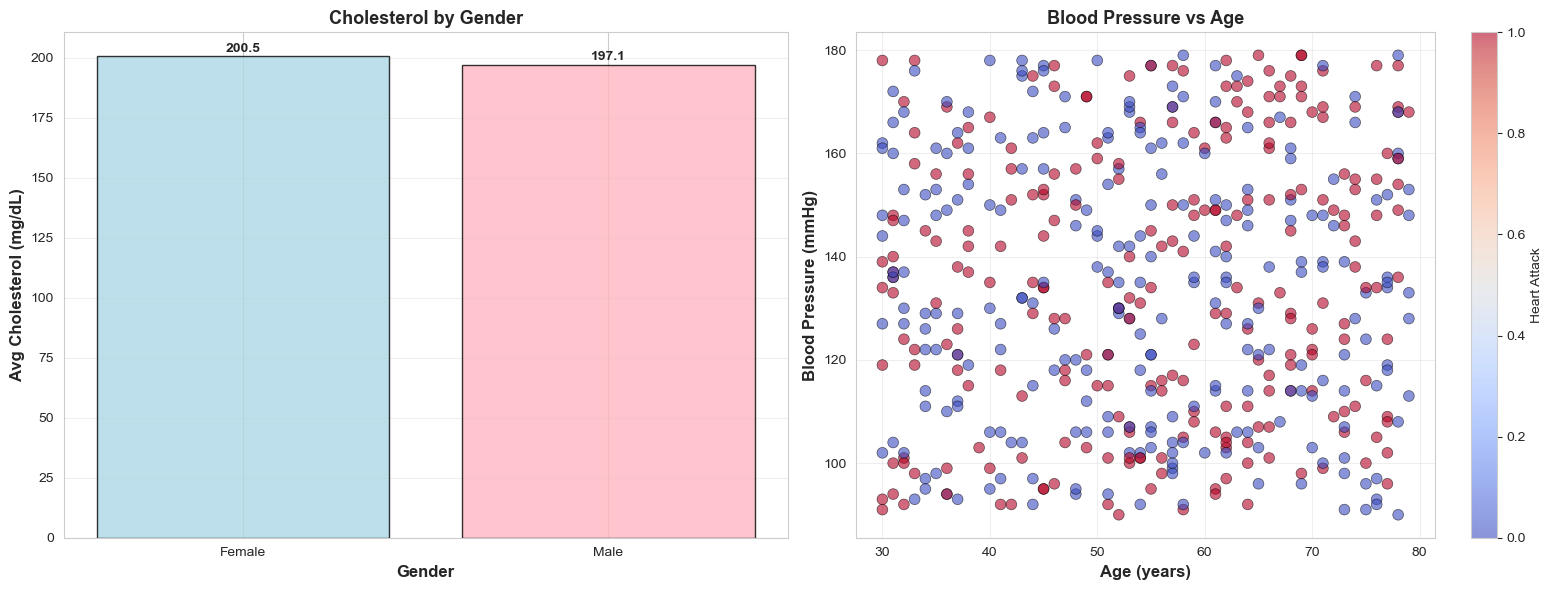

In [18]:
#Question 1C - CREATING MULTI AXES PLOTS

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Bar chart
gender_chol = df.groupby('gender')['cholesterol'].mean()
axes[0].bar(gender_chol.index, gender_chol.values, 
            color=['lightblue', 'lightpink'], edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Avg Cholesterol (mg/dL)', fontsize=12, fontweight='bold')
axes[0].set_title('Cholesterol by Gender', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(gender_chol.values):
    axes[0].text(i, v + 2, f'{v:.1f}', ha='center', fontweight='bold')

# Subplot 2: Scatter plot
scatter = axes[1].scatter(df['age'], df['blood_pressure'], 
                          c=df['heart_attack'], cmap='coolwarm', 
                          alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Age (years)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Blood Pressure (mmHg)', fontsize=12, fontweight='bold')
axes[1].set_title('Blood Pressure vs Age', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Heart Attack', fontsize=10)

plt.tight_layout()
plt.show()

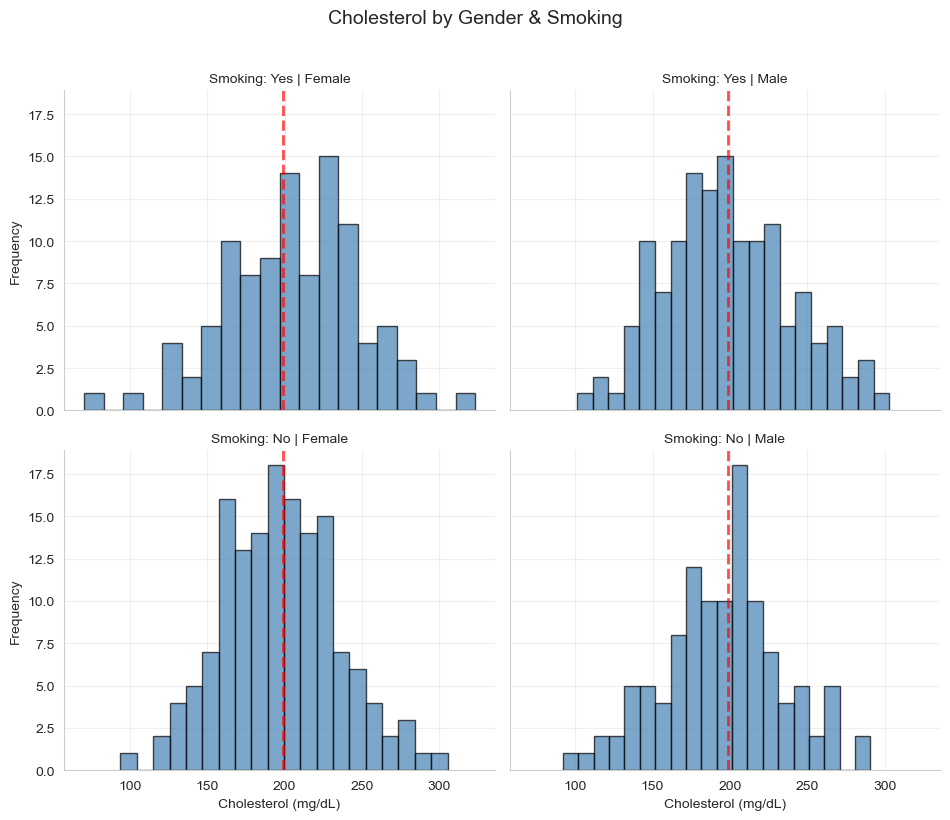

In [20]:
#QUESTION 1D -Combining Seaborn’s FacetGrid and Matplotlib:

# FacetGrid
g = sns.FacetGrid(df, col='gender', row='smoking_status', 
                  height=4, aspect=1.2)
g.map(plt.hist, 'cholesterol', bins=20, alpha=0.7, 
      color='steelblue', edgecolor='black')
g.set_axis_labels('Cholesterol (mg/dL)', 'Frequency')
g.set_titles(col_template='{col_name}', row_template='Smoking: {row_name}')
g.fig.suptitle('Cholesterol by Gender & Smoking', fontsize=14, y=1.02)

# Add mean lines
for ax in g.axes.flat:
    ax.axvline(df['cholesterol'].mean(), color='red', 
               linestyle='--', linewidth=2, alpha=0.7)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Grouped Statistics:
   gender smoking_status        mean       sem  count
0  Female             No  197.093675  3.050127    149
1  Female            Yes  205.466449  4.219530    102
2    Male             No  195.506544  3.640105    113
3    Male            Yes  198.448270  3.506657    136


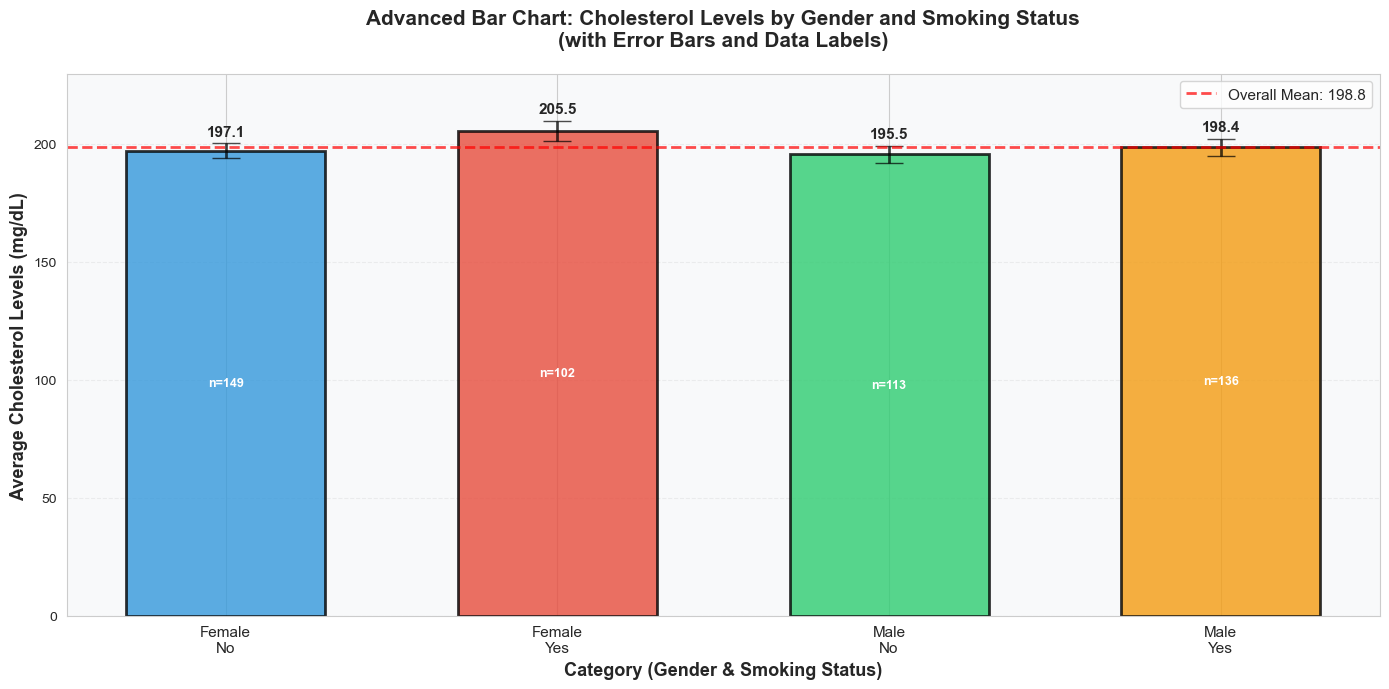


Overall Mean: 198.81 mg/dL

Detailed Statistics by Group:
gender smoking_status       mean      sem  count
Female             No 197.093675 3.050127    149
Female            Yes 205.466449 4.219530    102
  Male             No 195.506544 3.640105    113
  Male            Yes 198.448270 3.506657    136


In [26]:

# #QUESTION 1E - Advanced Bar Chart with Seaborn and Matplotlib:


# Calculate statistics for grouped data
grouped_data = df.groupby(['gender', 'smoking_status'])['cholesterol'].agg([
    ('mean', 'mean'),
    ('sem', 'sem'),
    ('count', 'count')
]).reset_index()

print("Grouped Statistics:")
print(grouped_data)

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Prepare categories and positions
categories = [f"{row['gender']}\n{row['smoking_status']}" 
              for _, row in grouped_data.iterrows()]
x_pos = np.arange(len(categories))
bar_width = 0.6  # Custom bar width

# Custom colors
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Create bars with error bars
bars = ax.bar(
    x_pos,
    grouped_data['mean'],
    bar_width,
    color=colors,
    alpha=0.8,
    edgecolor='black',
    linewidth=2,
    yerr=grouped_data['sem'],  # Error bars
    capsize=10,
    error_kw={'linewidth': 2, 'ecolor': 'black', 'alpha': 0.7}
)

# Add data labels on top of bars
for i, (bar, row) in enumerate(zip(bars, grouped_data.itertuples())):
    height = bar.get_height()
    
    # Mean value label (on top)
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height + row.sem + 2,
        f'{row.mean:.1f}',
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )
    
    # Sample size label (inside bar)
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height/2,
        f'n={row.count}',
        ha='center', va='center', fontsize=9, 
        color='white', fontweight='bold'
    )

# Customization
ax.set_xlabel('Category (Gender & Smoking Status)', 
              fontsize=13, fontweight='bold')
ax.set_ylabel('Average Cholesterol Levels (mg/dL)', 
              fontsize=13, fontweight='bold')
ax.set_title('Advanced Bar Chart: Cholesterol Levels by Gender and Smoking Status\n' +
             '(with Error Bars and Data Labels)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=11)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim(0, max(grouped_data['mean']) + max(grouped_data['sem']) + 20)

# Add reference line
overall_mean = df['cholesterol'].mean()
ax.axhline(y=overall_mean, color='red', linestyle='--', 
           linewidth=2, alpha=0.7, 
           label=f'Overall Mean: {overall_mean:.1f}')
ax.legend(fontsize=11, loc='upper right')
ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nOverall Mean: {overall_mean:.2f} mg/dL")
print("\nDetailed Statistics by Group:")
print(grouped_data.to_string(index=False))

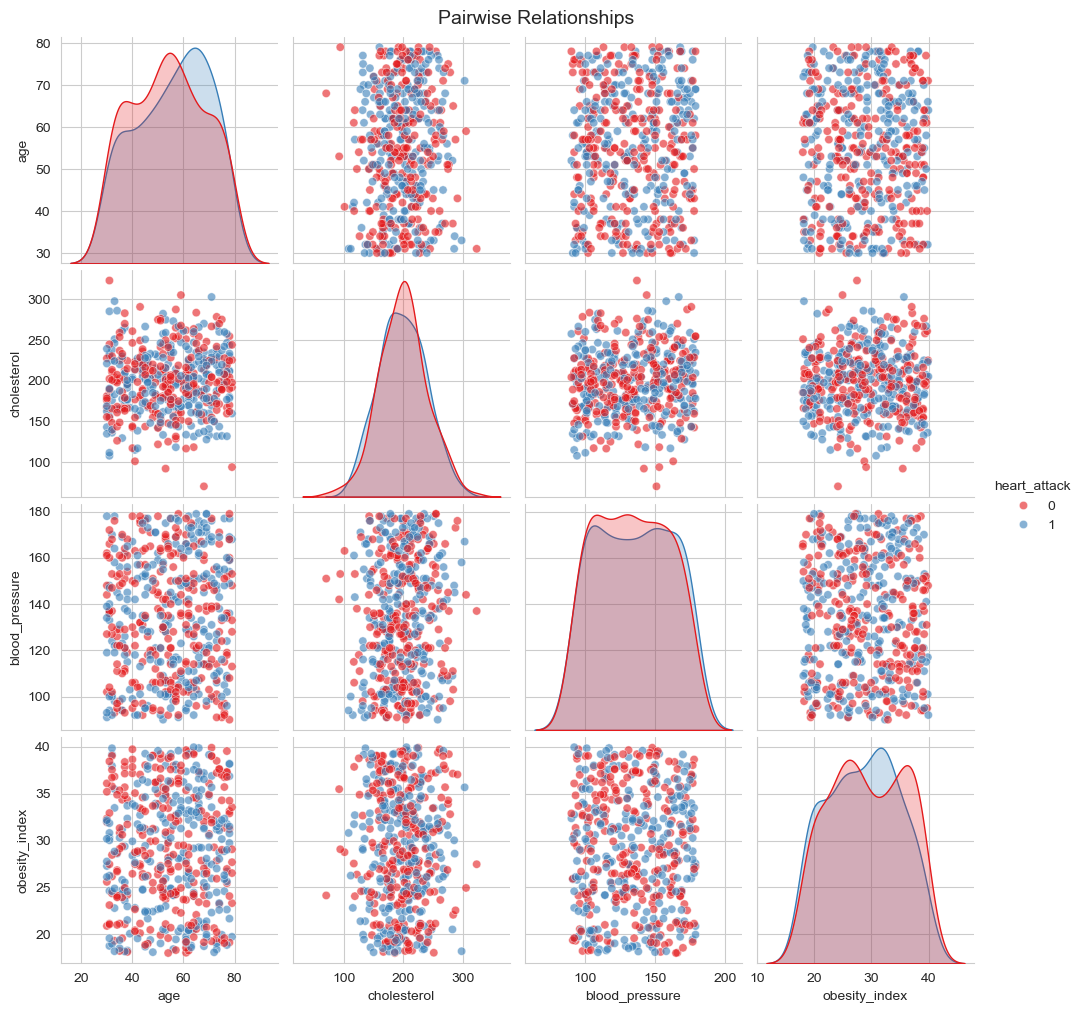

In [28]:
#Pairplot Showing Relationships


numeric_cols = ['age', 'cholesterol', 'blood_pressure', 'obesity_index']
sns.pairplot(df[numeric_cols + ['heart_attack']], 
             hue='heart_attack', diag_kind='kde', 
             palette='Set1', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships', y=1.01, fontsize=14)
plt.show()

In [36]:
# QUESTION 2

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [38]:
# Display dataset info
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (500, 8)
   age  cholesterol  blood_pressure  gender smoking_status physical_activity  \
0   68    70.349306             151  Female            Yes              High   
1   58   159.024494             162  Female             No            Medium   
2   44   189.897274             115  Female            Yes            Medium   
3   72   150.088673             155  Female             No               Low   
4   37   265.296452             162    Male            Yes               Low   

   obesity_index  heart_attack  
0      24.144074             0  
1      32.143402             0  
2      33.271313             0  
3      29.278405             0  
4      24.716835             1  


In [44]:
# Check what columns are in my dataset
print("Your dataset columns:")
print(df.columns.tolist())
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Your dataset columns:
['age', 'cholesterol', 'blood_pressure', 'gender', 'smoking_status', 'physical_activity', 'obesity_index', 'heart_attack']

Dataset shape: (500, 8)

First few rows:
   age  cholesterol  blood_pressure  gender smoking_status physical_activity  \
0   68    70.349306             151  Female            Yes              High   
1   58   159.024494             162  Female             No            Medium   
2   44   189.897274             115  Female            Yes            Medium   
3   72   150.088673             155  Female             No               Low   
4   37   265.296452             162    Male            Yes               Low   

   obesity_index  heart_attack  
0      24.144074             0  
1      32.143402             0  
2      33.271313             0  
3      29.278405             0  
4      24.716835             1  


TASK 2A: INTERACTIVE 3D SCATTER PLOT


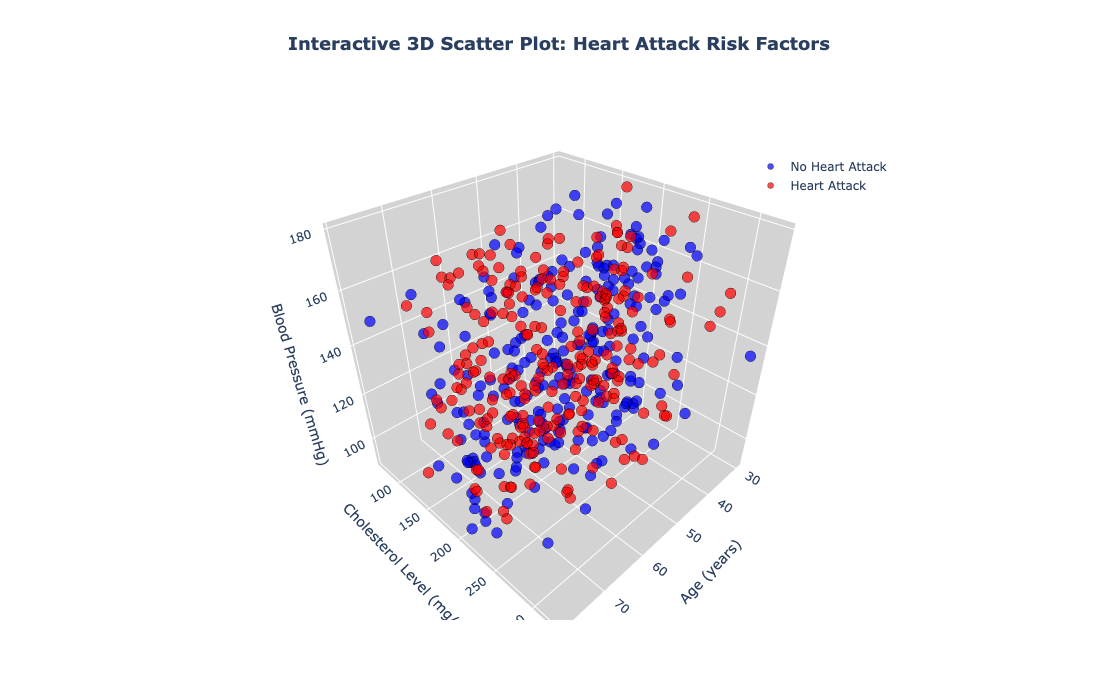

✓ Task 2A Complete!


In [62]:
# QUESTION 2A - Interactive 3D Scatter Plot of Heart Attack Risk Factors

print("="*60)
print("TASK 2A: INTERACTIVE 3D SCATTER PLOT")
print("="*60)

# Create hover text with additional details
hover_text = []
for idx, row in df.iterrows():
    text = (f"<b>Patient ID:</b> {idx}<br>"
            f"<b>Age:</b> {row['age']}<br>"
            f"<b>Cholesterol:</b> {row['cholesterol']:.1f}<br>"
            f"<b>Blood Pressure:</b> {row['blood_pressure']}<br>"
            f"<b>Gender:</b> {row['gender']}<br>"
            f"<b>Smoking Status:</b> {row['smoking_status']}<br>"
            f"<b>Obesity Index:</b> {row['obesity_index']:.2f}<br>"
            f"<b>Heart Attack:</b> {'Yes' if row['heart_attack'] == 1 else 'No'}")
    hover_text.append(text)

# Create 3D scatter plot
fig_task1 = go.Figure()

# Add traces for each outcome category
for outcome in [0, 1]:
    mask = df['heart_attack'] == outcome
    fig_task1.add_trace(go.Scatter3d(
        x=df[mask]['age'],
        y=df[mask]['cholesterol'],
        z=df[mask]['blood_pressure'],
        mode='markers',
        name='Heart Attack' if outcome == 1 else 'No Heart Attack',
        marker=dict(
            size=6,
            color='red' if outcome == 1 else 'blue',
            opacity=0.7,
            line=dict(color='black', width=0.5)
        ),
        text=[hover_text[i] for i in df[mask].index],
        hovertemplate='%{text}<extra></extra>'
    ))

# Update layout
fig_task1.update_layout(
    title={
        'text': '<b>Interactive 3D Scatter Plot: Heart Attack Risk Factors</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18}
    },
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Cholesterol Level (mg/dL)',
        zaxis_title='Blood Pressure (mmHg)',
        xaxis=dict(backgroundcolor="lightgray", gridcolor="white"),
        yaxis=dict(backgroundcolor="lightgray", gridcolor="white"),
        zaxis=dict(backgroundcolor="lightgray", gridcolor="white"),
    ),
    showlegend=True,
    legend=dict(x=0.7, y=0.9),
    width=1000,
    height=700
)

fig_task1.show()
print("✓ Task 2A Complete!")

In [60]:
#QUESTION 2B - Build a logistic regression model using Age and Cholesterol_Level as features to predict Heart_Attack_Outcome.

print("="*60)
print("TASK 2B: MODEL DEVELOPMENT")
print("="*60)

# Prepare data for modeling
X = df[['age', 'cholesterol']].values
y = df['heart_attack'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Evaluate model
train_score = log_model.score(X_train_scaled, y_train)
test_score = log_model.score(X_test_scaled, y_test)

print(f"✓ Model trained successfully!")
print(f"\nModel Performance:")
print(f"  Training Accuracy: {train_score:.3f} ({train_score*100:.1f}%)")
print(f"  Testing Accuracy: {test_score:.3f} ({test_score*100:.1f}%)")

TASK 2B: MODEL DEVELOPMENT
✓ Model trained successfully!

Model Performance:
  Training Accuracy: 0.500 (50.0%)
  Testing Accuracy: 0.540 (54.0%)


TASK 2C: 3D SURFACE PLOT


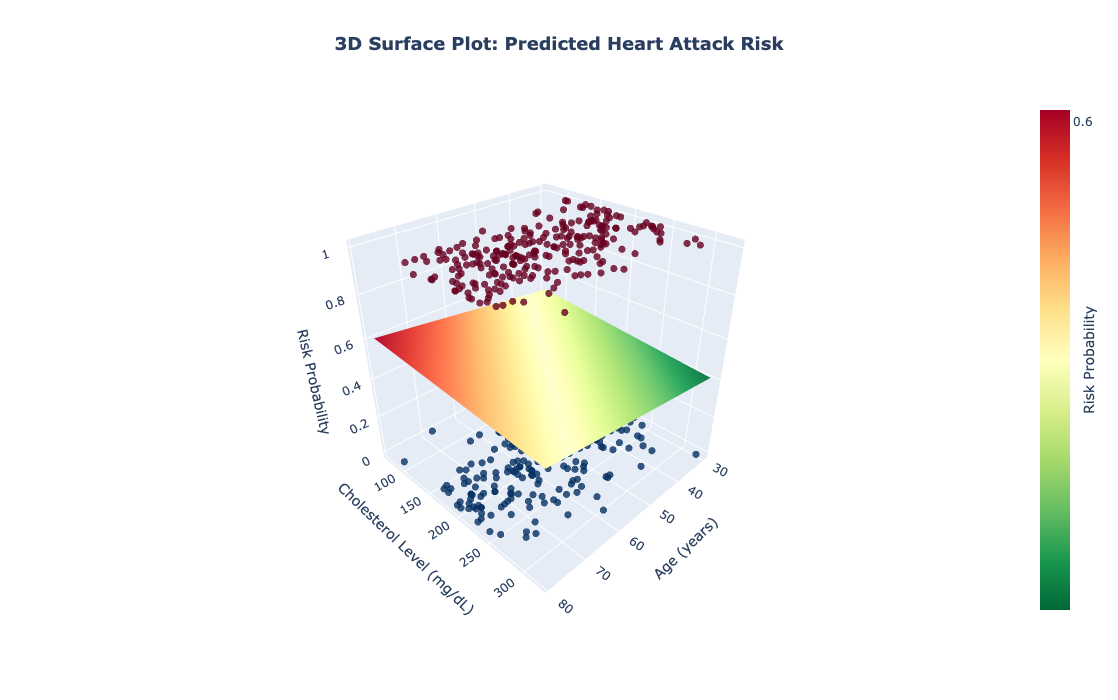

✓ Task 2C Complete!


In [64]:
#QUESTION 2C - Surface Plot Construction:




print("="*60)
print("TASK 2C: 3D SURFACE PLOT")
print("="*60)

# Create meshgrid for surface plot
age_range = np.linspace(df['age'].min(), df['age'].max(), 50)
chol_range = np.linspace(df['cholesterol'].min(), df['cholesterol'].max(), 50)
age_mesh, chol_mesh = np.meshgrid(age_range, chol_range)

# Prepare grid points for prediction
grid_points = np.c_[age_mesh.ravel(), chol_mesh.ravel()]
grid_points_scaled = scaler.transform(grid_points)

# Predict probabilities across the grid
risk_probs = log_model.predict_proba(grid_points_scaled)[:, 1]
risk_surface = risk_probs.reshape(age_mesh.shape)

# Create surface plot
fig_task2 = go.Figure(data=[
    go.Surface(
        x=age_mesh,
        y=chol_mesh,
        z=risk_surface,
        colorscale='RdYlGn_r',
        colorbar=dict(
            title="Risk Probability",
            titleside="right",
            tickmode="linear",
            tick0=0,
            dtick=0.2
        ),
        hovertemplate='Age: %{x}<br>Cholesterol: %{y}<br>Risk: %{z:.2f}<extra></extra>'
    )
])

# Add scatter points of actual data
fig_task2.add_trace(go.Scatter3d(
    x=df['age'],
    y=df['cholesterol'],
    z=df['heart_attack'],
    mode='markers',
    name='Actual Outcomes',
    marker=dict(
        size=4,
        color=df['heart_attack'],
        colorscale='RdBu_r',
        opacity=0.8
    ),
    hovertemplate='Age: %{x}<br>Cholesterol: %{y}<br>Outcome: %{z}<extra></extra>'
))

fig_task2.update_layout(
    title={
        'text': '<b>3D Surface Plot: Predicted Heart Attack Risk</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18}
    },
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Cholesterol Level (mg/dL)',
        zaxis_title='Risk Probability',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.3))
    ),
    width=1000,
    height=700
)

fig_task2.show()
print("✓ Task 2C Complete!")

In [76]:
print("="*60)
print("TASK 2D (i): DATA PREPARATION FOR CLUSTERING")
print("="*60)

# Select risk factors for clustering
cluster_features = ['age', 'cholesterol', 'blood_pressure', 'obesity_index']
X_cluster = df[cluster_features].values

# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("✓ Data prepared for clustering")
print(f"\nFeatures selected:")
for i, feature in enumerate(cluster_features, 1):
    print(f"  {i}. {feature}")

TASK 2D (i): DATA PREPARATION FOR CLUSTERING
✓ Data prepared for clustering

Features selected:
  1. age
  2. cholesterol
  3. blood_pressure
  4. obesity_index


In [68]:
print("="*60)
print("TASK 2D: FINDING OPTIMAL K")
print("="*60)

# Test different numbers of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 8)

print("\nTesting different numbers of clusters...")
print("-" * 50)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(X_cluster_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

# Choose optimal k
optimal_k = 3
print(f"\n✓ Optimal number of clusters: {optimal_k}")

TASK 2D: FINDING OPTIMAL K

Testing different numbers of clusters...
--------------------------------------------------


python(8050) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


k=2: Inertia=1608.63, Silhouette=0.194
k=3: Inertia=1353.73, Silhouette=0.193
k=4: Inertia=1174.35, Silhouette=0.196
k=5: Inertia=1030.95, Silhouette=0.209
k=6: Inertia=925.65, Silhouette=0.212
k=7: Inertia=838.41, Silhouette=0.223

✓ Optimal number of clusters: 3


In [74]:
print("="*60)
print("TASK 2D (ii): PERFORMING K-MEANS CLUSTERING")
print("="*60)

# Perform final clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df['Cluster'] = clusters

print(f"✓ Clustering completed with {optimal_k} clusters")
print(f"\nCluster distribution:")
for cluster in range(optimal_k):
    count = (df['Cluster'] == cluster).sum()
    print(f"  Cluster {cluster}: {count} patients ({count/len(df)*100:.1f}%)")

TASK 2D (ii): PERFORMING K-MEANS CLUSTERING
✓ Clustering completed with 3 clusters

Cluster distribution:
  Cluster 0: 181 patients (36.2%)
  Cluster 1: 175 patients (35.0%)
  Cluster 2: 144 patients (28.8%)


TASK 2: 2D (iii) CLUSTERING VISUALIZATION


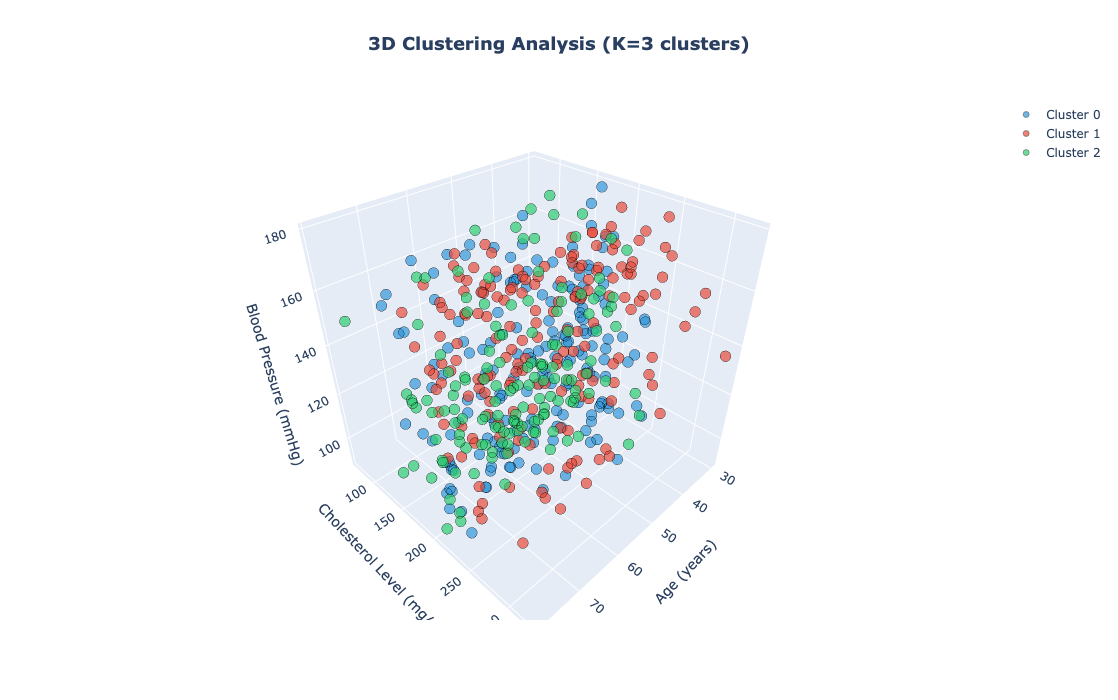

✓ Task 2D Complete!


In [104]:
print("="*60)
print("TASK 2: 2D (iii) CLUSTERING VISUALIZATION")
print("="*60)

# Create 3D scatter plot with clusters
fig_task3 = go.Figure()

# Define color palette
cluster_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#34495e']

for cluster in range(optimal_k):
    mask = df['Cluster'] == cluster
    
    # Create hover text
    hover_cluster = []
    for idx, row in df[mask].iterrows():
        text = (f"<b>Patient ID:</b> {idx}<br>"
                f"<b>Cluster:</b> {cluster}<br>"
                f"<b>Age:</b> {row['age']}<br>"
                f"<b>Cholesterol:</b> {row['cholesterol']:.1f}<br>"
                f"<b>Blood Pressure:</b> {row['blood_pressure']}<br>"
                f"<b>Obesity Index:</b> {row['obesity_index']:.2f}<br>"
                f"<b>Heart Attack:</b> {'Yes' if row['heart_attack'] == 1 else 'No'}")
        hover_cluster.append(text)
    
    fig_task3.add_trace(go.Scatter3d(
        x=df[mask]['age'],
        y=df[mask]['cholesterol'],
        z=df[mask]['blood_pressure'],
        mode='markers',
        name=f'Cluster {cluster}',
        marker=dict(
            size=6,
            color=cluster_colors[cluster],
            opacity=0.7,
            line=dict(color='black', width=0.5)
        ),
        text=hover_cluster,
        hovertemplate='%{text}<extra></extra>'
    ))

fig_task3.update_layout(
    title={
        'text': f'<b>3D Clustering Analysis (K={optimal_k} clusters)</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18}
    },
    scene=dict(
        xaxis_title='Age (years)',
        yaxis_title='Cholesterol Level (mg/dL)',
        zaxis_title='Blood Pressure (mmHg)',
    ),
    showlegend=True,
    width=1000,
    height=700
)

fig_task3.show()
print("✓ Task 2D Complete!")

In [82]:
print("="*60)
print("TASK 2D (iii)b: CLUSTER STATISTICS")
print("="*60)

# Analyze each cluster
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    heart_attack_rate = cluster_data['heart_attack'].mean() * 100
    
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster} PROFILE")
    print('='*50)
    print(f"Size: {len(cluster_data)} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"\nAverage Values:")
    print(f"  - Age: {cluster_data['age'].mean():.1f} years")
    print(f"  - Cholesterol: {cluster_data['cholesterol'].mean():.1f} mg/dL")
    print(f"  - Blood Pressure: {cluster_data['blood_pressure'].mean():.1f} mmHg")
    print(f"  - Obesity Index: {cluster_data['obesity_index'].mean():.2f}")
    print(f"\nHeart Attack Rate: {heart_attack_rate:.1f}%")

TASK 2D (iii)b: CLUSTER STATISTICS

CLUSTER 0 PROFILE
Size: 181 patients (36.2%)

Average Values:
  - Age: 52.0 years
  - Cholesterol: 185.3 mg/dL
  - Blood Pressure: 127.5 mmHg
  - Obesity Index: 22.91

Heart Attack Rate: 52.5%

CLUSTER 1 PROFILE
Size: 175 patients (35.0%)

Average Values:
  - Age: 58.5 years
  - Cholesterol: 233.7 mg/dL
  - Blood Pressure: 150.3 mmHg
  - Obesity Index: 30.20

Heart Attack Rate: 51.4%

CLUSTER 2 PROFILE
Size: 144 patients (28.8%)

Average Values:
  - Age: 54.1 years
  - Cholesterol: 173.3 mg/dL
  - Blood Pressure: 122.8 mmHg
  - Obesity Index: 34.97

Heart Attack Rate: 43.8%


In [94]:
#QUESTION 3: DATA VISUALIZATION


In [96]:
!pip install dash dash-bootstrap-components

python(9222) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 1.1 MB/s  0:00:28 eta 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 5.3 MB/s  0:00:01m0:00:0100:01
  Attempting uninstall: clickm━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/10 [narwhals]
    Found existing installation: click 7.1.2━━━━━━━━━━━━━━━━━━  2/10 [narwhals]
    Uninstalling click-7.1.2:0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/10 [narwhals]
      Successfully uninstalled click-7.1.2━━━━━━━━━━━━━━━━━━━━  2/10 [narwhals]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [dash-bootstrap-components]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


In [102]:
import sys
!{sys.executable} -m pip install dash dash-bootstrap-components

python(10889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached dash-3.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached dash_bootstrap_components-2.0.4-py3-none-any.whl.metadata (18 kB)
  Using cached retrying-1.4.2-py3-none-any.whl.metadata (5.5 kB)
Using cached dash-3.3.0-py3-none-any.whl (7.9 MB)
Using cached dash_bootstrap_components-2.0.4-py3-none-any.whl (204 kB)
Using cached retrying-1.4.2-py3-none-any.whl (10 kB)


In [116]:
print("="*60)
print("TASK 3: INTERACTIVE DASHBOARD")
print("="*60)

import dash
from dash import dcc, html, Input, Output, State
import dash_bootstrap_components as dbc
import plotly.graph_objects as go

# Store df globally for callbacks
dashboard_df = df.copy()

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# ============================================
# APP LAYOUT
# ============================================
app.layout = dbc.Container([
    html.H1("Heart Attack Risk Analysis Dashboard", 
            className="text-center my-4",
            style={'color': '#2c3e50', 'fontWeight': 'bold'}),
    
    html.Hr(),
    
    # Filters Section
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader(html.H4("Data Filters", style={'fontWeight': 'bold'})),
                dbc.CardBody([
                    # Age Range Filter
                    html.Label("Age Range:", style={'fontWeight': 'bold', 'marginTop': '10px'}),
                    dcc.RangeSlider(
                        id='age-slider',
                        min=int(dashboard_df['age'].min()),
                        max=int(dashboard_df['age'].max()),
                        step=1,
                        marks={int(dashboard_df['age'].min()): str(int(dashboard_df['age'].min())),
                               int(dashboard_df['age'].max()): str(int(dashboard_df['age'].max()))},
                        value=[int(dashboard_df['age'].min()), int(dashboard_df['age'].max())],
                        tooltip={"placement": "bottom", "always_visible": True}
                    ),
                    
                    html.Br(),
                    
                    # Cholesterol Range Filter
                    html.Label("Cholesterol Level Range:", style={'fontWeight': 'bold', 'marginTop': '10px'}),
                    dcc.RangeSlider(
                        id='cholesterol-slider',
                        min=int(dashboard_df['cholesterol'].min()),
                        max=int(dashboard_df['cholesterol'].max()),
                        step=5,
                        marks={int(dashboard_df['cholesterol'].min()): str(int(dashboard_df['cholesterol'].min())),
                               int(dashboard_df['cholesterol'].max()): str(int(dashboard_df['cholesterol'].max()))},
                        value=[int(dashboard_df['cholesterol'].min()), int(dashboard_df['cholesterol'].max())],
                        tooltip={"placement": "bottom", "always_visible": True}
                    ),
                    
                    html.Br(),
                    
                    # Blood Pressure Range Filter
                    html.Label("Blood Pressure Range:", style={'fontWeight': 'bold', 'marginTop': '10px'}),
                    dcc.RangeSlider(
                        id='bp-slider',
                        min=int(dashboard_df['blood_pressure'].min()),
                        max=int(dashboard_df['blood_pressure'].max()),
                        step=5,
                        marks={int(dashboard_df['blood_pressure'].min()): str(int(dashboard_df['blood_pressure'].min())),
                               int(dashboard_df['blood_pressure'].max()): str(int(dashboard_df['blood_pressure'].max()))},
                        value=[int(dashboard_df['blood_pressure'].min()), int(dashboard_df['blood_pressure'].max())],
                        tooltip={"placement": "bottom", "always_visible": True}
                    ),
                    
                    html.Br(),
                    
                    # Gender Filter
                    html.Label("Gender:", style={'fontWeight': 'bold', 'marginTop': '10px'}),
                    dcc.Dropdown(
                        id='gender-dropdown',
                        options=[{'label': 'All', 'value': 'All'}] + 
                                [{'label': g, 'value': g} for g in dashboard_df['gender'].unique()],
                        value='All',
                        clearable=False
                    ),
                    
                    html.Br(),
                    
                    # Smoking Status Filter
                    html.Label("Smoking Status:", style={'fontWeight': 'bold', 'marginTop': '10px'}),
                    dcc.Dropdown(
                        id='smoking-dropdown',
                        options=[{'label': 'All', 'value': 'All'}] + 
                                [{'label': s, 'value': s} for s in dashboard_df['smoking_status'].unique()],
                        value='All',
                        clearable=False
                    ),
                    
                    html.Br(),
                    html.Hr(),
                    
                    # Download Button
                    dbc.Button(
                        "📥 Download Filtered Data as CSV", 
                        id="btn-download", 
                        color="success", 
                        size="lg",
                        className="w-100 mt-3"
                    ),
                    dcc.Download(id="download-dataframe-csv")
                ])
            ])
        ], width=3),
        
        # Visualizations Section
        dbc.Col([
            # Summary Cards
            dbc.Row([
                dbc.Col([
                    dbc.Card([
                        dbc.CardBody([
                            html.H6("Total Patients", className="text-muted"),
                            html.H2(id="total-patients", className="text-primary", 
                                   style={'fontWeight': 'bold'})
                        ])
                    ], style={'textAlign': 'center'})
                ], width=4),
                
                dbc.Col([
                    dbc.Card([
                        dbc.CardBody([
                            html.H6("Heart Attacks", className="text-muted"),
                            html.H2(id="heart-attacks", className="text-danger",
                                   style={'fontWeight': 'bold'})
                        ])
                    ], style={'textAlign': 'center'})
                ], width=4),
                
                dbc.Col([
                    dbc.Card([
                        dbc.CardBody([
                            html.H6("Risk Rate", className="text-muted"),
                            html.H2(id="risk-rate", className="text-warning",
                                   style={'fontWeight': 'bold'})
                        ])
                    ], style={'textAlign': 'center'})
                ], width=4),
            ], className="mb-4"),
            
            # Bar Chart
            dbc.Card([
                dbc.CardBody([
                    dcc.Graph(id='outcome-bar-chart')
                ])
            ])
            
        ], width=9)
    ])
    
], fluid=True, style={'backgroundColor': '#f8f9fa', 'paddingTop': '20px', 'paddingBottom': '50px'})

# ============================================
# CALLBACKS
# ============================================

# Update dashboard based on filters
@app.callback(
    [Output('total-patients', 'children'),
     Output('heart-attacks', 'children'),
     Output('risk-rate', 'children'),
     Output('outcome-bar-chart', 'figure')],
    [Input('age-slider', 'value'),
     Input('cholesterol-slider', 'value'),
     Input('bp-slider', 'value'),
     Input('gender-dropdown', 'value'),
     Input('smoking-dropdown', 'value')]
)
def update_dashboard(age_range, chol_range, bp_range, gender, smoking):
    # Filter data based on selections
    filtered_df = dashboard_df.copy()
    
    # Apply filters
    filtered_df = filtered_df[
        (filtered_df['age'] >= age_range[0]) & 
        (filtered_df['age'] <= age_range[1])
    ]
    
    filtered_df = filtered_df[
        (filtered_df['cholesterol'] >= chol_range[0]) & 
        (filtered_df['cholesterol'] <= chol_range[1])
    ]
    
    filtered_df = filtered_df[
        (filtered_df['blood_pressure'] >= bp_range[0]) & 
        (filtered_df['blood_pressure'] <= bp_range[1])
    ]
    
    if gender != 'All':
        filtered_df = filtered_df[filtered_df['gender'] == gender]
    
    if smoking != 'All':
        filtered_df = filtered_df[filtered_df['smoking_status'] == smoking]
    
    # Calculate summary statistics
    total_patients = len(filtered_df)
    heart_attacks = int(filtered_df['heart_attack'].sum())
    risk_rate = f"{(heart_attacks/total_patients*100):.1f}%" if total_patients > 0 else "0%"
    
    # Create Bar Chart
    outcome_counts = filtered_df['heart_attack'].value_counts().sort_index()
    
    bar_fig = go.Figure(data=[
        go.Bar(
            x=['No Heart Attack (0)', 'Heart Attack (1)'],
            y=[outcome_counts.get(0, 0), outcome_counts.get(1, 0)],
            marker=dict(
                color=['#27ae60', '#e74c3c'],
                line=dict(color='black', width=2)
            ),
            text=[outcome_counts.get(0, 0), outcome_counts.get(1, 0)],
            textposition='outside',
            textfont=dict(size=18, color='black'),
            hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>'
        )
    ])
    
    bar_fig.update_layout(
        title={
            'text': '<b>Filtered Heart Attack Outcome Distribution (Bar Chart)</b>',
            'x': 0.5,
            'xanchor': 'center',
            'font': {'size': 20}
        },
        xaxis_title='<b>Heart Attack Outcome</b>',
        yaxis_title='<b>Number of Patients</b>',
        showlegend=False,
        height=500,
        plot_bgcolor='white',
        yaxis=dict(gridcolor='lightgray'),
        font=dict(size=14)
    )
    
    return str(total_patients), str(heart_attacks), risk_rate, bar_fig

# Download callback
@app.callback(
    Output("download-dataframe-csv", "data"),
    Input("btn-download", "n_clicks"),
    [State('age-slider', 'value'),
     State('cholesterol-slider', 'value'),
     State('bp-slider', 'value'),
     State('gender-dropdown', 'value'),
     State('smoking-dropdown', 'value')],
    prevent_initial_call=True
)
def download_csv(n_clicks, age_range, chol_range, bp_range, gender, smoking):
    # Filter data based on current selections
    filtered_df = dashboard_df.copy()
    
    filtered_df = filtered_df[
        (filtered_df['age'] >= age_range[0]) & 
        (filtered_df['age'] <= age_range[1])
    ]
    
    filtered_df = filtered_df[
        (filtered_df['cholesterol'] >= chol_range[0]) & 
        (filtered_df['cholesterol'] <= chol_range[1])
    ]
    
    filtered_df = filtered_df[
        (filtered_df['blood_pressure'] >= bp_range[0]) & 
        (filtered_df['blood_pressure'] <= bp_range[1])
    ]
    
    if gender != 'All':
        filtered_df = filtered_df[filtered_df['gender'] == gender]
    
    if smoking != 'All':
        filtered_df = filtered_df[filtered_df['smoking_status'] == smoking]
    
    return dcc.send_data_frame(filtered_df.to_csv, "filtered_heart_data.csv", index=False)

# ============================================
# RUN APP
# ============================================
print("\n" + "="*60)
print("STARTING INTERACTIVE DASHBOARD")
print("="*60)
print("\n🌐 Dashboard URL: http://127.0.0.1:8050/")
print("\n📊 Dashboard Features:")
print("  ✓ Interactive filters (Age, Cholesterol, BP, Gender, Smoking)")
print("  ✓ Real-time bar chart updates")
print("  ✓ Summary statistics cards")
print("  ✓ CSV download button")
print("\n To stop: Click 'Interrupt Kernel' button in Jupyter")
print("="*60 + "\n")

# Run the app (FIXED - changed from run_server to run)
app.run(debug=False, port=8050)

TASK 3: INTERACTIVE DASHBOARD

STARTING INTERACTIVE DASHBOARD

🌐 Dashboard URL: http://127.0.0.1:8050/

📊 Dashboard Features:
  ✓ Interactive filters (Age, Cholesterol, BP, Gender, Smoking)
  ✓ Real-time bar chart updates
  ✓ Summary statistics cards
  ✓ CSV download button

 To stop: Click 'Interrupt Kernel' button in Jupyter

